In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

In [313]:
df_train = read_csv('emotions_train.csv')

In [314]:
df_train.head(10)

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
5,ive been feeling a little burdened lately wasn...,sadness
6,ive been taking or milligrams or times recomme...,surprise
7,i feel as confused about life as a teenager or...,fear
8,i have been with petronas for years i feel tha...,joy
9,i feel romantic too,love


In [315]:
df_train.shape

(21459, 2)

In [316]:
df_train.shape[0]

21459

In [317]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


In [318]:
# Recherche de valeurs manquantes
df_train.isna().sum()

Text       0
Emotion    0
dtype: int64

In [319]:
duplicata = df_train.Text.duplicated() 

- Il y a des données dupliquées. Faut-il les supprimer ou pas, on verra ??

In [320]:
len(df_train[duplicata])

54

Il y a peu de données dupliquées soit 0.02% , donc nous allons les supprimer.

In [321]:
#df_train.Text.unique().size

- 21459 expressions dont 21405 uniques

In [322]:
df_train.drop

<bound method DataFrame.drop of                                                     Text  Emotion
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
21454               Melissa stared at her friend in dism     fear
21455  Successive state elections have seen the gover...     fear
21456               Vincent was irritated but not dismay     fear
21457  Kendall-Hume turned back to face the dismayed ...     fear
21458                    I am dismayed , but not surpris     fear

[21459 rows x 2 columns]>

In [323]:
df_train_unique = df.drop_duplicates(subset='Text')

In [324]:
df_train_unique.shape

(21405, 3)

In [325]:
# Nombre de caractère prèsent dans chaque phrase
nb_caracteres = df_train_unique['Text'].str.len()
nb_caracteres

0         23
1        108
2         48
3         92
4         20
        ... 
21454     36
21455     91
21456     36
21457     50
21458     31
Name: Text, Length: 21405, dtype: int64

<Axes: >

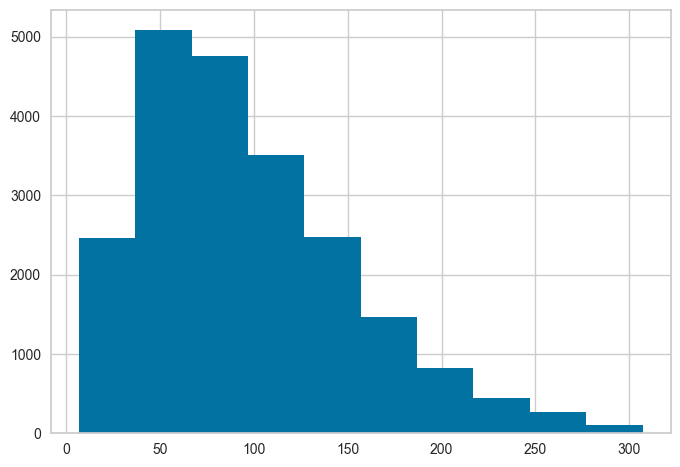

In [326]:
nb_caracteres .hist()

- Le nombre de caractère s'étends entre 20 et 300 caractères et générallement c'est entre 50 à 80 caractères.

In [327]:
# Recherche du nombre de mots présents dans les phrases
nb_de_mots = df['Text'].str.split().map(lambda x: len(x))
nb_de_mots

0         4
1        21
2        10
3        18
4         4
         ..
21454     7
21455    13
21456     6
21457     8
21458     7
Name: Text, Length: 21405, dtype: int64

<Axes: >

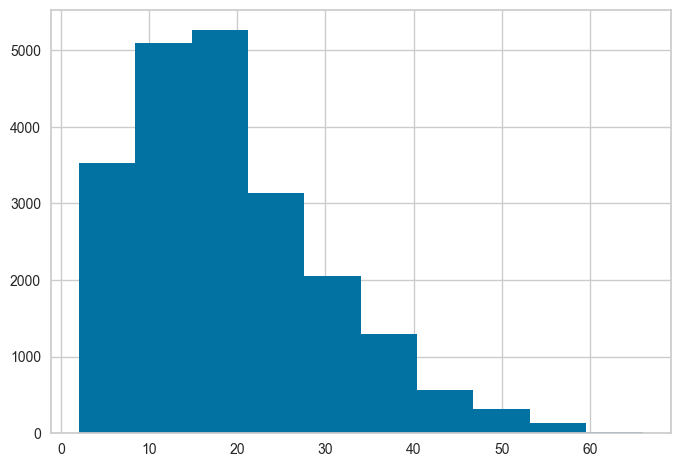

In [328]:
nb_de_mots.hist()

- Le nombre de mots présents dans les phrases est compris entre 4 et 60 mots, et le plus frèquent, c'est entre 15 à 20 mots.

In [329]:
# Moyenne des longueurs des mots
moyenne_longueur_mots = df['Text'].str.split().apply(lambda x : [len(i) for i in x]). map(lambda x: np.mean(x))
moyenne_longueur_mots

0        5.000000
1        4.190476
2        3.900000
3        4.166667
4        4.250000
           ...   
21454    4.285714
21455    6.076923
21456    5.166667
21457    5.375000
21458    3.571429
Name: Text, Length: 21405, dtype: float64

<Axes: >

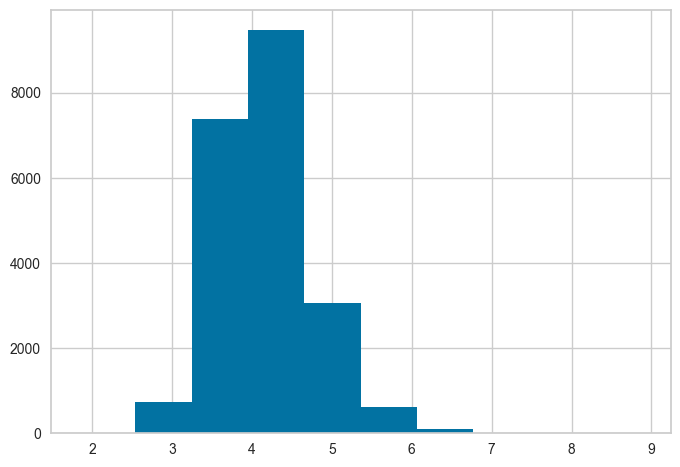

In [330]:
moyenne_longueur_mots.hist()

- En moyenne, 3 à 7 mots sont utilisés, plus frèquemment 5 mots. Ceci nous rensegnerait-il que les gens utilisent de mots courts pour exprimer leurs émotions??

In [331]:
#! pip install Wordcloud

In [332]:
from wordcloud import WordCloud

In [333]:
text = " ".join(df_train_unique['Text'])

In [334]:
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size = 10).generate(text)


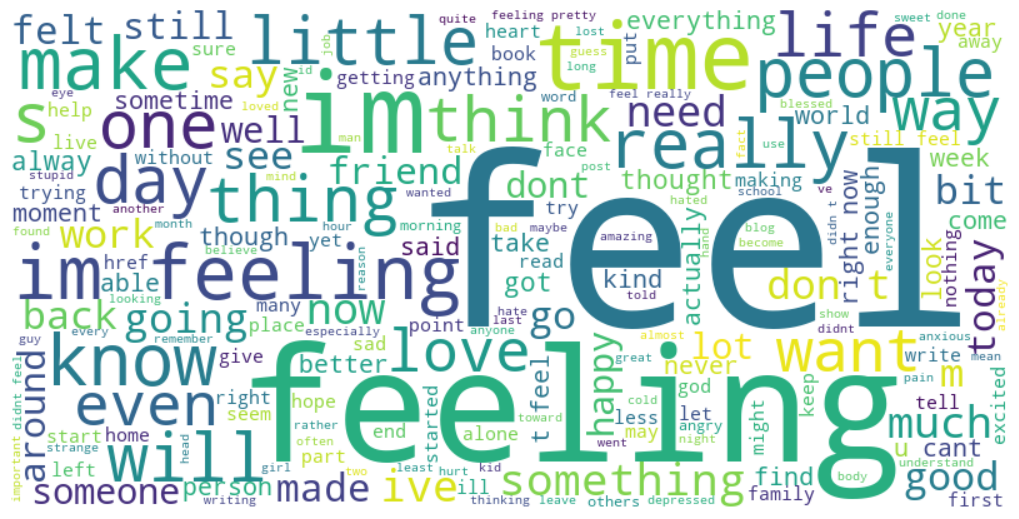

In [335]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0) 
plt.show()

In [336]:
df_train_unique.Emotion.unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [337]:
import plotly.graph_objects as go

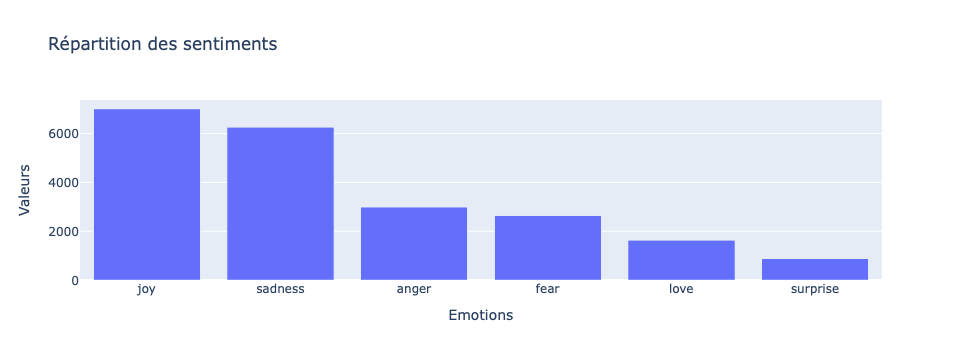

In [338]:
# Répartition du target

fig = go.Figure([go.Bar(x=df_train_unique['Emotion'].value_counts().index, y=df_train_unique['Emotion'].value_counts().tolist())])
fig.update_layout(
    title="Répartition des sentiments",
    xaxis_title="Emotions",
    yaxis_title="Valeurs")
fig.show()

In [339]:
# NLTK

In [340]:
import nltk

In [341]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amina.sadio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [342]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amina.sadio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amina.sadio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [343]:
df_train_unique.Text

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
21454                 Melissa stared at her friend in dism
21455    Successive state elections have seen the gover...
21456                 Vincent was irritated but not dismay
21457    Kendall-Hume turned back to face the dismayed ...
21458                      I am dismayed , but not surpris
Name: Text, Length: 21405, dtype: object

In [344]:
df = df_train_unique.copy()

In [345]:
# Traitement du texte 
def text_processing(text):
     #Charger les stop-words en anglais
    stop_words = set(stopwords.words('english'))
   

    # Initialiser le lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Appliquer la tokenisation à tous les textes
    tokens = word_tokenize(text.lower())

    # Supprimer les ponctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    

    # Supprimer les stop-words
    tokens = [word for word in tokens if word not in stop_words]
    

    # Appliquer la lemmatisation à tous les tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = ' '.join(tokens)
   

    return tokens
    

In [346]:
df['Text_process'] = df['Text'].apply(text_processing)

In [347]:
df.head()

,Text,Emotion,Text_process
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [348]:
df1 = df.drop(columns = ['Text'])

In [349]:
df1.head()

,Emotion,Text_process
0,sadness,didnt feel humiliated
1,sadness,go feeling hopeless damned hopeful around some...
2,anger,im grabbing minute post feel greedy wrong
3,love,ever feeling nostalgic fireplace know still pr...
4,anger,feeling grouchy


- Utilisation de Pycaret pour les modèles de machine learning 

In [350]:
from pycaret.classification import *

In [351]:
# Initialisation du setup
classification_setup = setup(data= df1, target='Emotion',normalize=True,normalize_method='robust',session_id = 6563)

,Description,Value
0,Session id,6563
1,Target,Emotion
2,Target type,Multiclass
3,Target mapping,"anger: 0, fear: 1, joy: 2, love: 3, sadness: 4, surprise: 5"
4,Original data shape,"(21405, 2)"
5,Transformed data shape,"(21405, 2)"
6,Transformed train set shape,"(14983, 2)"
7,Transformed test set shape,"(6422, 2)"
8,Categorical features,1
9,Preprocess,True


In [352]:
# Entrainement et évaluation des performances des modèles
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.3328,0.0000,0.3328,0.6412,0.1731,0.0092,0.0626,0.0270
lr,Logistic Regression,0.3326,0.0000,0.3326,0.6336,0.1728,0.0089,0.0616,0.0870
et,Extra Trees Classifier,0.3326,0.5055,0.3326,0.6336,0.1728,0.0089,0.0616,0.0730
svm,SVM - Linear Kernel,0.3319,0.0000,0.3319,0.5086,0.1712,0.0075,0.0550,0.0500
ridge,Ridge Classifier,0.3316,0.0000,0.3316,0.4579,0.1708,0.0070,0.0509,0.0380
ada,Ada Boost Classifier,0.3302,0.0000,0.3302,0.3188,0.1678,0.0060,0.0412,0.1110
dummy,Dummy Classifier,0.3274,0.5000,0.3274,0.1072,0.1615,0.0000,0.0000,0.0260
nb,Naive Bayes,0.2745,0.5066,0.2745,0.6542,0.1311,0.0076,0.0569,0.0310
qda,Quadratic Discriminant Analysis,0.2745,0.0000,0.2745,0.6542,0.1311,0.0076,0.0569,0.0300
knn,K Neighbors Classifier,0.1335,0.5054,0.1335,0.7939,0.0554,0.0070,0.0548,0.0560


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

- Les performances des différents modèles entrainés sont médiocres. çà peut étre dù à la qualité des données oubien d'autres paramètres.

In [353]:
print(best)

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


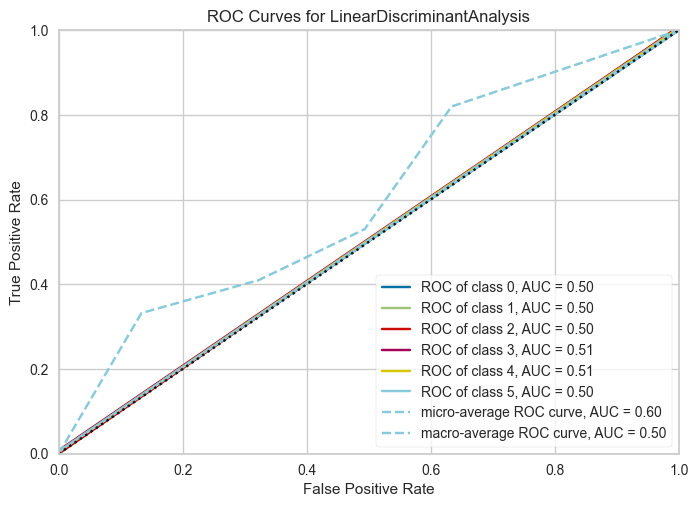

In [354]:
plot_model(best, plot = 'auc')

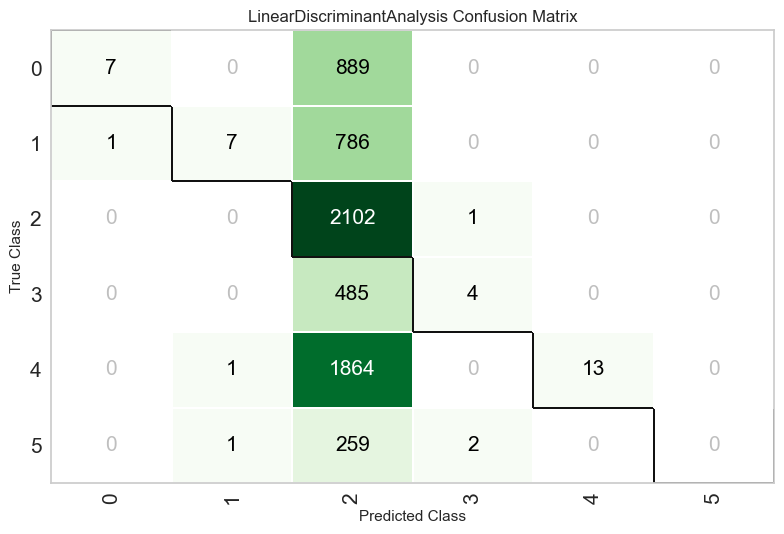

In [355]:
# Matrice de confusion
plot_model(best, plot = 'confusion_matrix')

- On voit clairement, d'après la matrice de confusion, que le modèle peine à identifier les classes correspondantes 

In [356]:
#predict_model(best)

In [357]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('...
                 ('normalize',
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=Robust

In [358]:
#s = setup(df_emotions, target = 'Emotion', session_id = 123, index= False, text_feature = ['Text'])


In [359]:
#df_test.columns = df_test.columns.str.replace('sentiment', 'Emotion')
#df_test.columns = df_test.columns.str.replace('content', 'Text')

In [360]:
#df_test.columns

In [361]:
#df_emotions = pd.concat([df, df_test])

In [362]:
#df_emotions.shape

In [363]:
#df_emotions.head()

In [364]:
#from pycaret.classification import *

In [365]:
#! pip install pycaret

In [366]:
#from pycaret.classification import *
#s = setup(df_emotions, target = 'Emotion', session_id = 123, index= False, text_feature = ['Text'])


In [367]:
#conda install lightgbm

In [368]:
#df_emotions["Emotion"].value_counts()